#### You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("marketing_data.csv")

## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

####  *There is a white space in the name of Income coloumn. Income coloumn=> remoce $ sign

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
#no more white space in coloumns
df.columns = df.columns.str.replace(' ', '')

In [6]:
# remove dollar sign and change type to integer
df['Income']=df['Income'].str.replace('$','')
df['Income']=df['Income'].str.replace(',','').astype(float)
df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


# 1.EDA

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

####  *There are 24 null values in Income coloumn (2216)
#### *Dt_customer => change to date

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

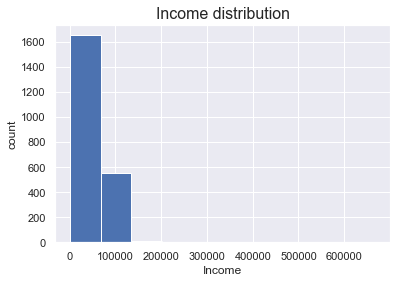

In [10]:
#histogram of income
df.Income.hist()
plt.title('Income distribution', size=16)
plt.xlabel('Income')
plt.ylabel('count')
plt.show()

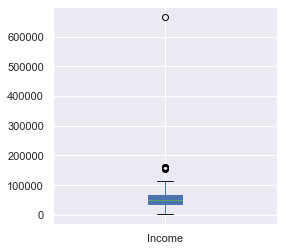

In [11]:
df['Income'].plot(kind='box', figsize=(4,4), patch_artist=True)

In [12]:
#As it is shown on the figure we have some outliers. To avoid to be effected from them, fill null values with the median value 
df['Income'] = df['Income'].fillna(df['Income'].median())

### Determine Outliers

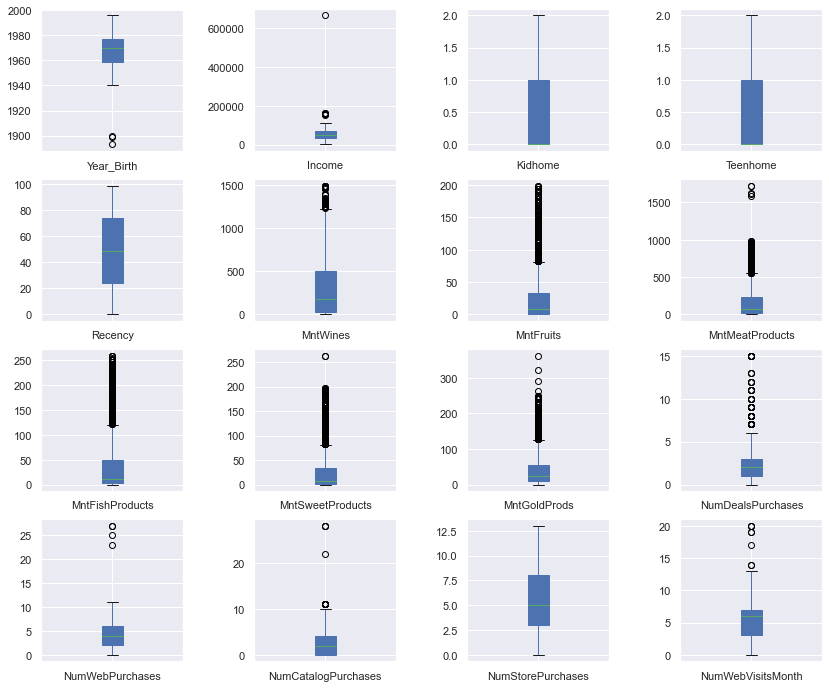

In [13]:
df2 = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
df2.plot(subplots=True, layout=(4,4), kind='box', figsize=(14,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
#Some Year_Birth values are <1900. Drop them.

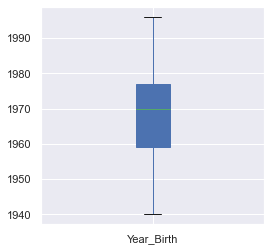

In [14]:
#get rid of outliers
df = df[df['Year_Birth'] > 1900]
df['Year_Birth'].plot(kind='box', figsize=(4,4), patch_artist=True)

### Feature Engineering

In [15]:
today_date=pd.to_datetime('today').normalize()
today_date

Timestamp('2021-02-08 00:00:00')

#### Today date-Dt_customer=how many years with us
#### Dt_customer-Year_Birth=Age when enrolled
#### Total spending amount= Sum of all given amount
#### Total purchases= Sum of all given purchases
#### children=teenagers+kids
#### add all campains inclusing the last one named 'Response'

In [16]:
df['days_together'] = (today_date - df['Dt_Customer']).dt.days
df['age_of_enrollment'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['children']=df['Kidhome']+df['Teenhome']
df['total_spent'] = (df['MntFishProducts'] + df['MntWines'] + df['MntSweetProducts'] +df['MntFruits'] + df['MntMeatProducts'] + df['MntGoldProds'] )
df['total_purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] +df['NumCatalogPurchases'])

campaigns = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['total_campains']=df[campaigns].sum(axis=1)

df[['ID', 'days_together', 'age_of_enrollment', 'children', 'total_spent', 'total_purchases','total_campains']].head()

,ID,days_together,age_of_enrollment,children,total_spent,total_purchases,total_campains
0,1826,2429,44,0,1190,15,1
1,1,2430,53,0,577,18,2
2,10476,2463,56,1,251,11,0
3,1386,2465,47,2,11,4,0
4,5371,2498,25,1,91,8,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [18]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,days_together,age_of_enrollment,children,total_spent,total_purchases,total_campains
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52227.407689,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,...,0.064372,0.013411,0.149307,0.008941,2769.790344,44.126062,0.950827,605.743406,14.870809,0.447027
std,3245.118591,11.701917,25043.266830,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,...,0.245469,0.115052,0.356471,0.094152,202.137961,11.739008,0.752037,601.840466,7.676593,0.890964
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2416.000000,16.000000,0.000000,5.000000,0.000000,0.000000
25%,2829.000000,1959.000000,35523.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,2597.000000,36.000000,0.000000,69.000000,8.000000,0.000000
50%,5455.000000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,2772.000000,43.000000,1.000000,396.000000,15.000000,0.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,2945.000000,54.000000,1.000000,1045.000000,21.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3115.000000,73.000000,3.000000,2525.000000,44.000000,5.000000


### Visualization of coloumns 

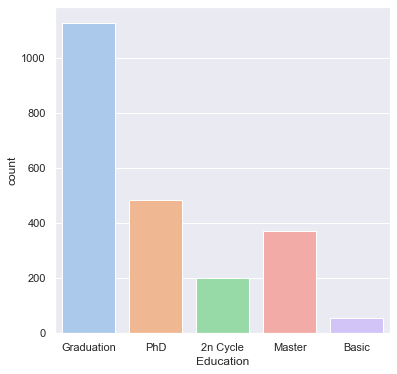

In [19]:
plt.figure(figsize = (6, 6))
sns.countplot(x = df['Education'], palette = 'pastel')

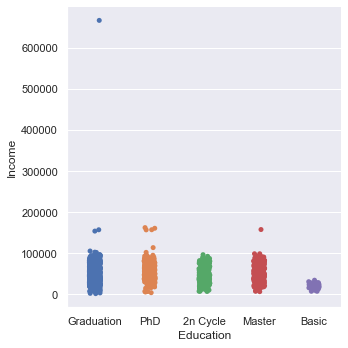

In [20]:
sns.catplot(x="Education", y="Income", data=df)

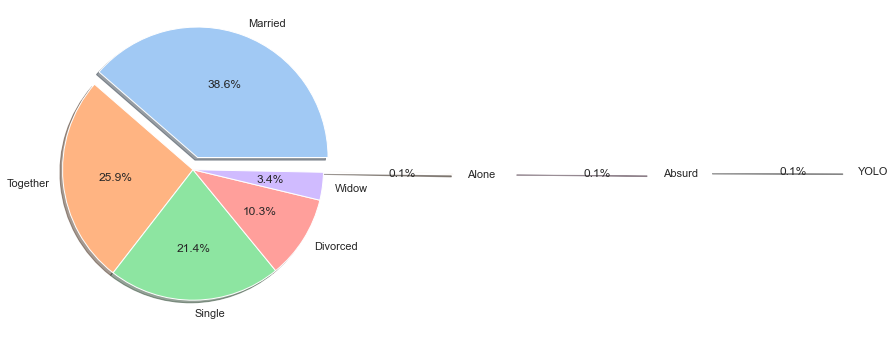

In [21]:
m = df['Marital_Status'].value_counts().to_frame('Count')
sns.set_palette('pastel')
plt.figure(figsize = (6, 6))
plt.pie(m['Count'], labels = m.index, explode = (0.1, 0, 0, 0, 0, 1, 2.5, 4), shadow = True, autopct = '%1.1f%%')
plt.show()

Text(0.5, 0, 'Customer Age When Enrolled')

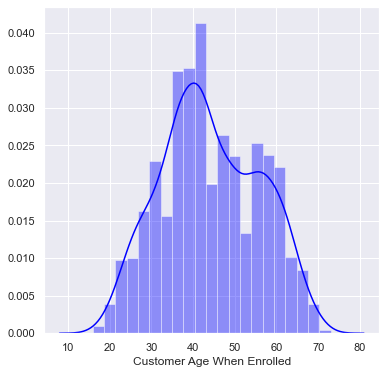

In [22]:
plt.figure(figsize = (6, 6))
sns.distplot(df['age_of_enrollment'], color = 'blue')
plt.xlabel('Customer Age When Enrolled')

Text(0, 0.5, 'Number of Customer per country')

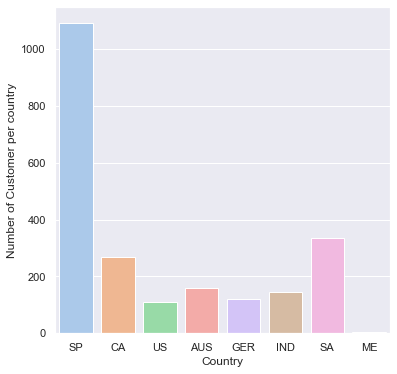

In [23]:
plt.figure(figsize = (6, 6))
sns.countplot(x = df['Country'], palette = 'pastel')
plt.ylabel('Number of Customer per country')

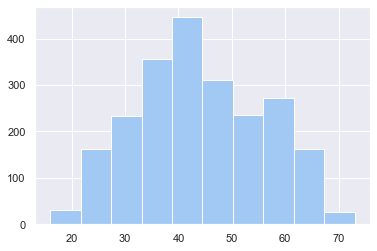

In [24]:
df.age_of_enrollment.hist()

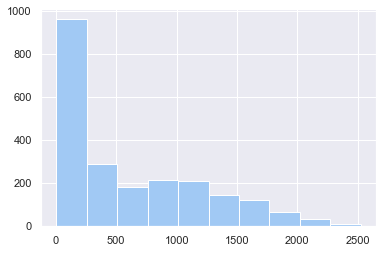

In [25]:
df.total_spent.hist()

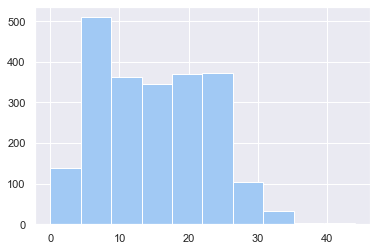

In [26]:
df.total_purchases.hist()

In [27]:
...

Ellipsis

## Feature Correlation

#### The correlations between our continous variables

In [28]:
correlation=df[['Income','days_together','age_of_enrollment','total_spent','total_purchases','total_campains','Recency', 'Complain','children', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].corr()
correlation

,Income,days_together,age_of_enrollment,total_spent,total_purchases,total_campains,Recency,Complain,children,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Income,1.000000,-0.018163,0.163129,0.664707,0.563999,0.286882,-0.003205,-0.024866,-0.290380,0.321082,-0.082089,0.380847,0.586750,0.527346,-0.549429
days_together,-0.018163,1.000000,-0.069556,0.158658,0.207024,0.068877,0.024157,0.035676,-0.025737,0.160123,0.218043,0.191169,0.095780,0.109635,0.272121
age_of_enrollment,0.163129,-0.069556,1.000000,0.105114,0.168609,-0.010393,0.018119,0.003026,0.097056,0.049109,0.056939,0.143763,0.120089,0.133385,-0.131750
total_spent,0.664707,0.158658,0.105114,1.000000,0.754390,0.455918,0.021199,-0.033740,-0.498514,0.522762,-0.065158,0.519993,0.778375,0.675573,-0.499922
total_purchases,0.563999,0.207024,0.168609,0.754390,1.000000,0.257708,0.006073,-0.015727,-0.245976,0.494361,0.361936,0.777634,0.735272,0.820089,-0.313162
total_campains,0.286882,0.068877,-0.010393,0.455918,0.257708,1.000000,-0.088749,-0.015677,-0.253522,0.202930,-0.093690,0.205126,0.351386,0.172876,-0.128092
Recency,-0.003205,0.024157,0.018119,0.021199,0.006073,-0.088749,1.000000,0.005398,0.017796,0.017412,-0.000987,-0.010616,0.025449,0.001117,-0.021959
Complain,-0.024866,0.035676,0.003026,-0.033740,-0.015727,-0.015677,0.005398,1.000000,0.031477,-0.029874,0.003599,-0.013233,-0.018279,-0.011524,0.020784
children,-0.290380,-0.025737,0.097056,-0.498514,-0.245976,-0.253522,0.017796,0.031477,1.000000,-0.264959,0.439633,-0.146435,-0.439615,-0.321701,0.417909
MntGoldProds,0.321082,0.160123,0.049109,0.522762,0.494361,0.202930,0.017412,-0.029874,-0.264959,1.000000,0.049942,0.422731,0.436997,0.383264,-0.249093


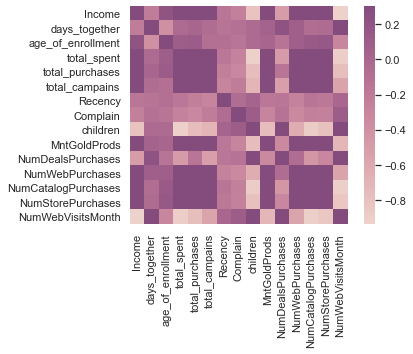

In [29]:
cmap=sns.cubehelix_palette(22,15,as_cmap=True)
sns.heatmap(correlation.corr(),vmax=0.3,center=0, cmap=cmap,square=True)

####  Assumptions:
#### There is a clear collebration between Income and total_spent, total_purchases
#### children and total_spent, total_purchases (negative)
#### *determine relationship between campains and income
#### *determine relationship between webvisits and web sells

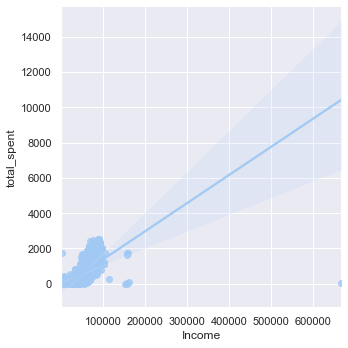

In [30]:
sns.lmplot(x='Income', y='total_spent', data=df)

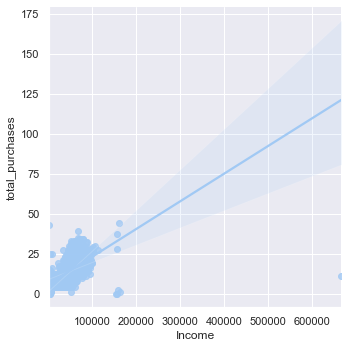

In [31]:
sns.lmplot(x='Income', y='total_purchases', data=df)

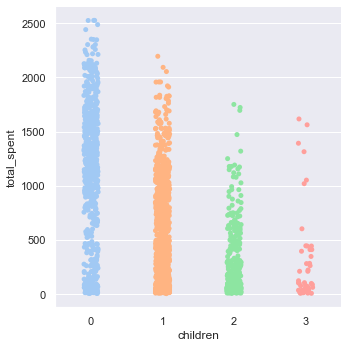

In [32]:
sns.catplot(x="children", y="total_spent", data=df)
#there is a negative correlation between chilren and total_spent

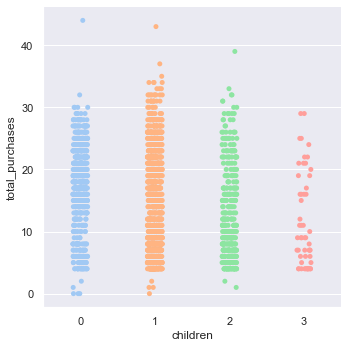

In [33]:
sns.catplot(x="children", y="total_purchases", data=df)
#there is a negative correlation between chilren and total_purchases

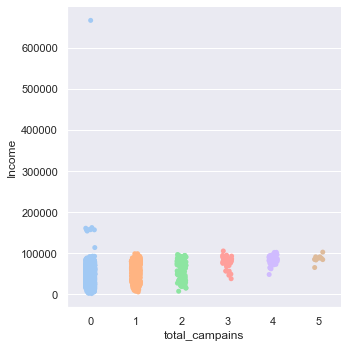

In [34]:
sns.catplot(x="total_campains", y="Income", data=df)
#all campains accepted by the income range between 60000-100000

In [35]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'days_together',
       'age_of_enrollment', 'children', 'total_spent', 'total_purchases',
       'total_campains'],
      dtype='object')

[Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebPurchases'),
 Text(0, 0, 'NumCatalogPurchases'),
 Text(0, 0, 'NumStorePurchases'),
 Text(0, 0, 'NumWebVisitsMonth')]

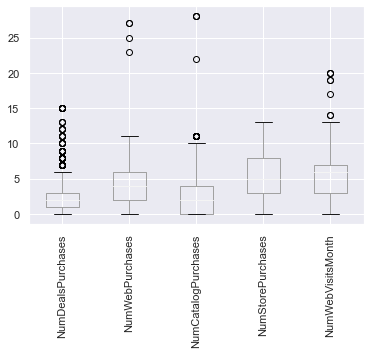

In [36]:
chart=df.boxplot(column=['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

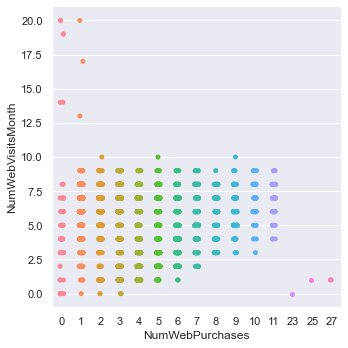

In [37]:
sns.catplot(x="NumWebPurchases", y="NumWebVisitsMonth", data=df)
#there is no correlation 

#### The correlations between our categorical variables

In [38]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'days_together',
       'age_of_enrollment', 'children', 'total_spent', 'total_purchases',
       'total_campains'],
      dtype='object')

In [39]:
df_cat=df[['Education', 'Marital_Status', 'Country' ]]
df_cat

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP
...,...,...,...
2235,PhD,Divorced,US
2236,2n Cycle,Married,SP
2237,Graduation,Divorced,SP
2238,Graduation,Married,IND


Graph for Education total: 5


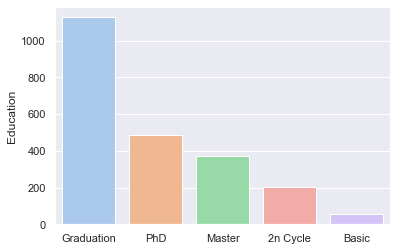

Graph for Marital_Status total: 8


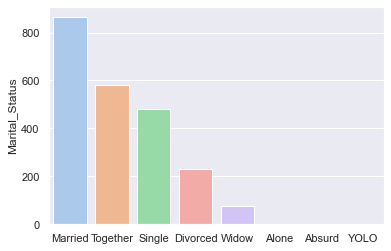

Graph for Country total: 8


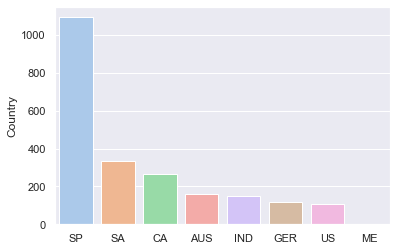

In [40]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("Graph for %s total: %d"%(i,len(cat_num)))
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

In [41]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'days_together',
       'age_of_enrollment', 'children', 'total_spent', 'total_purchases',
       'total_campains'],
      dtype='object')

## Determine Campain Success

In [42]:
df_campains=df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response']]
df_campains.describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,0.072865,0.074654,0.072418,0.064372,0.013411,0.149307
std,0.259974,0.262890,0.259237,0.245469,0.115052,0.356471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


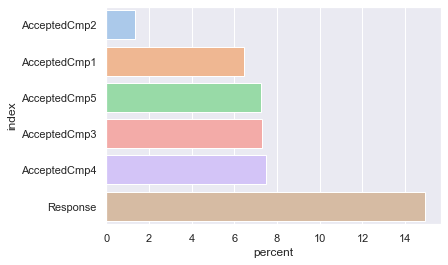

In [43]:
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['percent']).reset_index()
sns.barplot(x='percent', y='index', data=cam_success.sort_values('percent'), palette='pastel')

### Determine target customer

####  We have seen that customers with less number of children has higher amont of purchase meanwhile customers with higher income has higher amount of purchase 

#### Target customer in order to increase the sales,

#### Prefably has income between 50000-75000
#### Has least amount of children. (0,1) possible.
#### for enrollment, 44 years old.
#### has income of approximately $52000
#### was born in 1969
#### made a purchase 49 days ago
#### became customer 8 (2762 days) years ago

In [44]:
df_channels=df[['Year_Birth', 'age_of_enrollment', 'Income', 'Recency','days_together','children']]
df_channels.describe()

,Year_Birth,age_of_enrollment,Income,Recency,days_together,children
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,44.126062,52227.407689,49.104604,2769.790344,0.950827
std,11.701917,11.739008,25043.266830,28.956073,202.137961,0.752037
min,1940.000000,16.000000,1730.000000,0.000000,2416.000000,0.000000
25%,1959.000000,36.000000,35523.000000,24.000000,2597.000000,0.000000
50%,1970.000000,43.000000,51381.500000,49.000000,2772.000000,1.000000
75%,1977.000000,54.000000,68281.000000,74.000000,2945.000000,1.000000
max,1996.000000,73.000000,666666.000000,99.000000,3115.000000,3.000000


## Determine Sales Channels Success for target customer

In [45]:
df_channels=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
df_channels.describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2237.000000,2237.000000,2237.000000,2237.000000
mean,2.326777,4.087170,2.662494,5.794367
std,1.932923,2.779461,2.923456,3.250940
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


####  Target customer, 
#### made 2 deal purchase, 4 web purchase, made 2 catalog purchase, 5 store purchase
#### visited web siste 5 times in a month

## Compare sales performance of products

In [46]:
df_products=df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
df_products.describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708
std,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


####  Target customer spent,
#### Over 300 Dollars on wines,
#### 26 Dollars on Fruits and Sweet Products,
#### 167 Dollars on Meat products,
#### 37-43 Dollars on Fish and Gold Products.

# Conclusion

####  Target customer profile, sales chanels and product preferences are determined.

#### Advertising campaign acceptance is negatively correlated with childrean (kids/teens) and positively correlated with having income. Suggestion: Focus on group with high income and without children (or children<3)

#### The most succesful sales channels were Store purchases and Web purchases. Suggestion: Specific campains for these channels to increase sales.

#### The most successful products were Wines and Meats (customers spent on these products most). Suggestion: Specific campains for these products to increase sales.

#### The most succesful campain was the last one. 

In [47]:
#Statistical Analysis-95% confidence interval on customer price, age, days_together, Recency and children

import statsmodels.stats.api as sms

In [53]:
df.age_of_enrollment.mean()

44.12606168976308

In [54]:
sms.DescrStatsW(df.age_of_enrollment).tconfint_mean()

(43.6393389271235, 44.61278445240266)

In [55]:
sms.DescrStatsW(df.Income).tconfint_mean()

(51189.063759038305, 53265.75161869973)

In [56]:
sms.DescrStatsW(df.children).tconfint_mean()

(0.9196460473416803, 0.9820079535523742)

In [57]:
sms.DescrStatsW(df.days_together).tconfint_mean()

(2761.4093000736157, 2778.171388348378)

In [58]:
sms.DescrStatsW(df.Recency).tconfint_mean()

(47.90402767742579, 50.30518108430867)